<a href="https://colab.research.google.com/github/tbrandonstevenson/Data-Exercises/blob/main/RevenueClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#load csv data offline
import pandas as pd
raw_data=pd.read_csv('coding_round_data.csv')

#view general properties of data
display(raw_data.info())

display(raw_data.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [216]:
raw_data.isnull().values.any()

False

On the surface it appears that there isn't any missing data, as all columns show the same count of 12330. It is still possible that the populated data could be incorrect or nonsensical though. I will create some simple plots to check for this. First let me inspect the unique values for each column to get a sense of whether they are categorical or numerical.

In [6]:
#view unique values for each column
for key in raw_data:
  print(key)
  print(len(raw_data[key].unique()))
  print(sorted(raw_data[key].unique()))
  print()

Administrative
27
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]

Administrative_Duration
3335
[0.0, 1.333333333, 2.0, 3.0, 3.5, 4.0, 4.333333333, 4.5, 4.75, 5.0, 5.066666667, 5.384615385, 5.5, 6.0, 6.333333333, 6.4, 6.5, 7.0, 7.1, 7.125, 7.5, 7.6, 7.625, 8.0, 8.1, 8.214285713999999, 8.5, 9.0, 9.1, 9.166666667000001, 9.5, 9.6, 10.0, 10.1, 10.3, 10.5, 10.66666667, 10.77142857, 11.0, 11.1, 11.16666667, 11.33333333, 11.42857143, 11.5, 11.6, 11.66666667, 11.83333333, 11.88888889, 11.92307692, 12.0, 12.06666667, 12.1, 12.5, 12.6, 12.625, 12.83333333, 13.0, 13.1, 13.33333333, 13.5, 13.61904762, 13.73333333, 13.75, 13.83333333, 13.875, 14.0, 14.2, 14.25, 14.5, 14.75, 15.0, 15.1, 15.2, 15.41666667, 15.5, 15.6, 15.66666667, 15.75, 15.8, 16.0, 16.2, 16.25, 16.33333333, 16.5, 16.6, 16.66666667, 17.0, 17.1, 17.13333333, 17.2, 17.33333333, 17.34848485, 17.5, 17.6, 17.75, 17.94545455, 18.0, 18.1, 18.2, 18.25, 18.33333333, 18.5, 18.6, 18.75, 18.8333

To get a better idea of how these variables affect the result, I will plot the unconditional mean result for each categorical value and see if there is any structure. I have identified variables that I believe are categorical based on the unique counts above. For the numerical data, I will perform some reasonable log-spaced binning to observe structure. I include error bars which are determined by assuming a binomial distribution for the Revenue value in each bin/value of the plotted variable.

Administrative


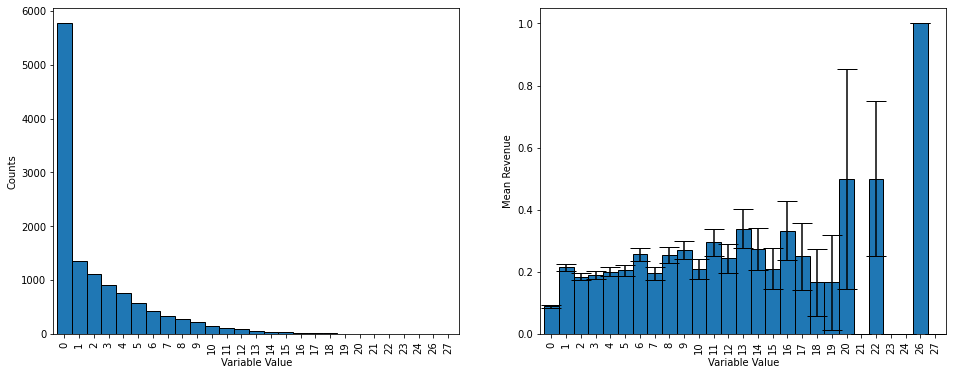

Administrative_Duration


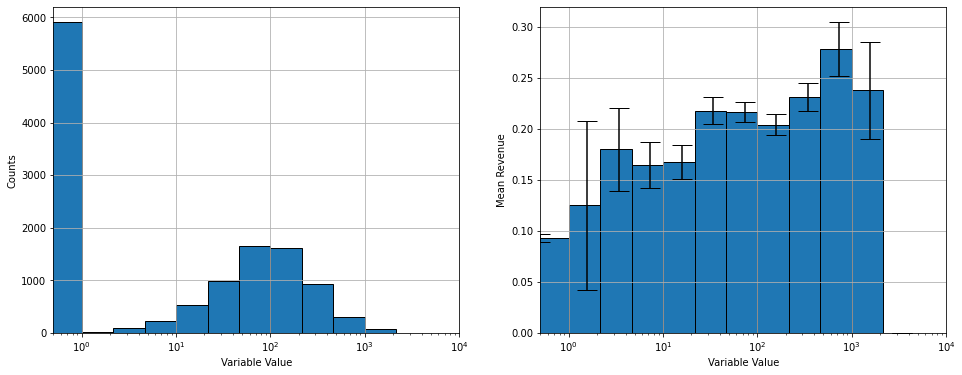

Informational


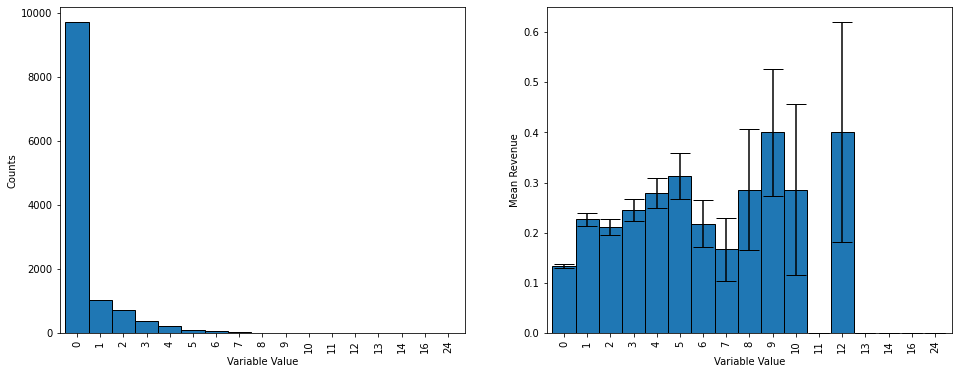

Informational_Duration


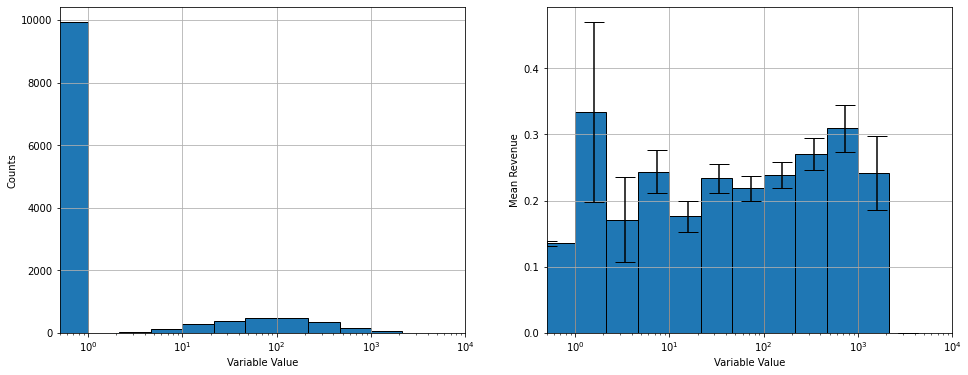

ProductRelated


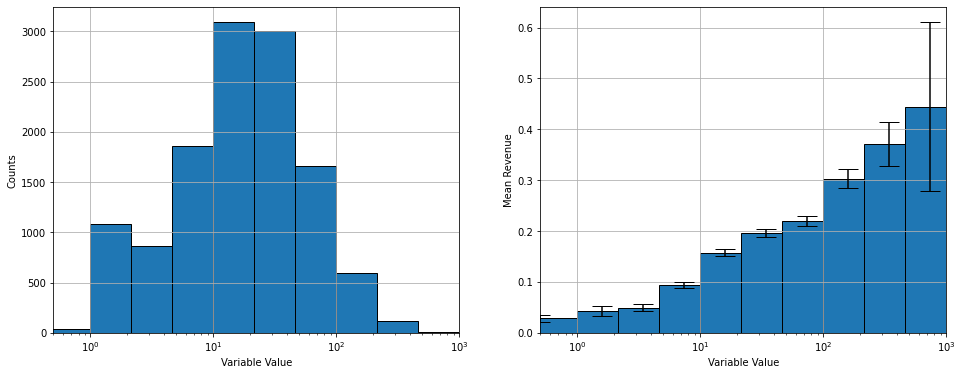

ProductRelated_Duration


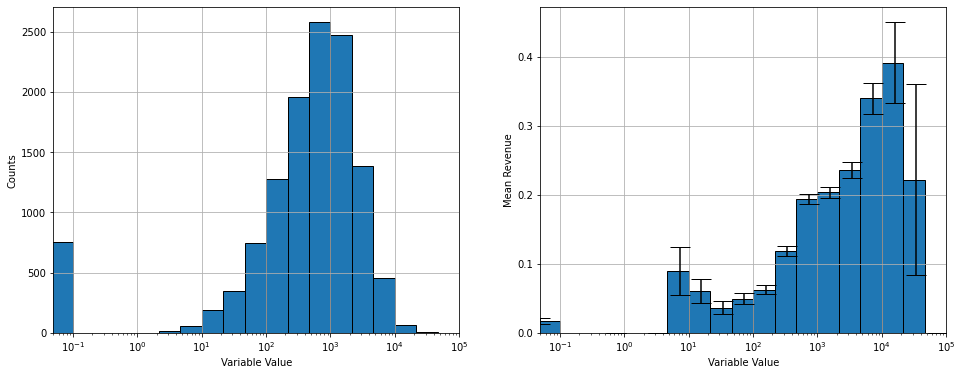

BounceRates


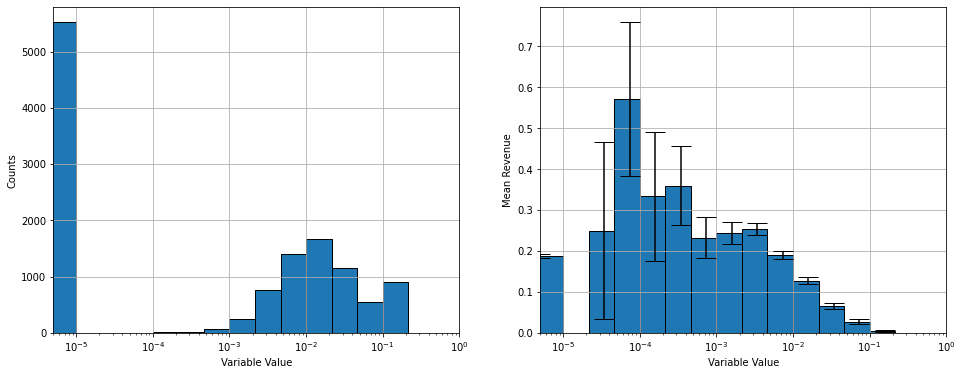

ExitRates


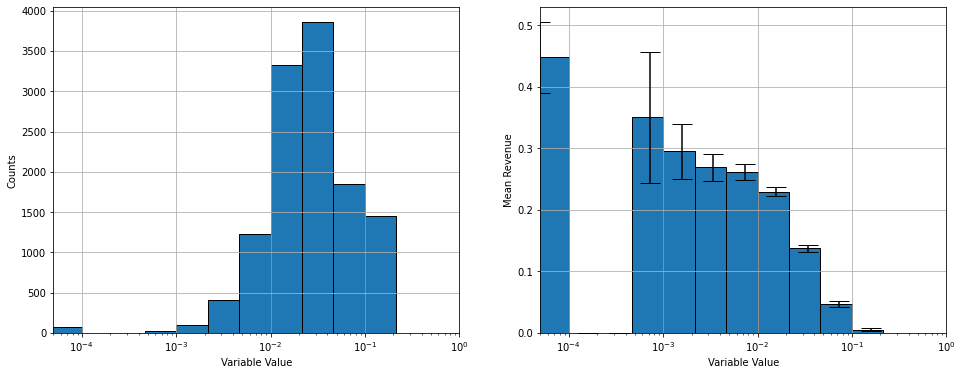

PageValues


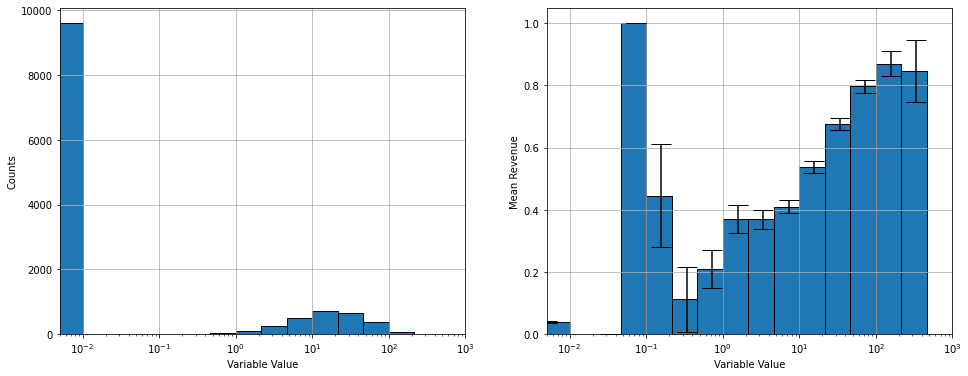

SpecialDay


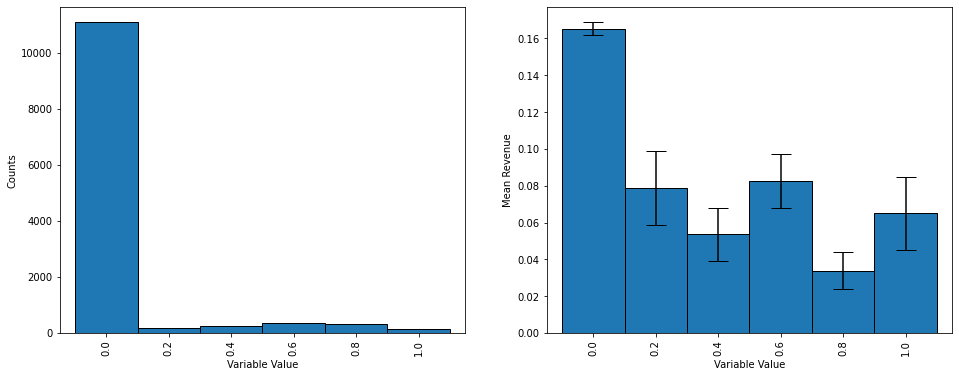

Month


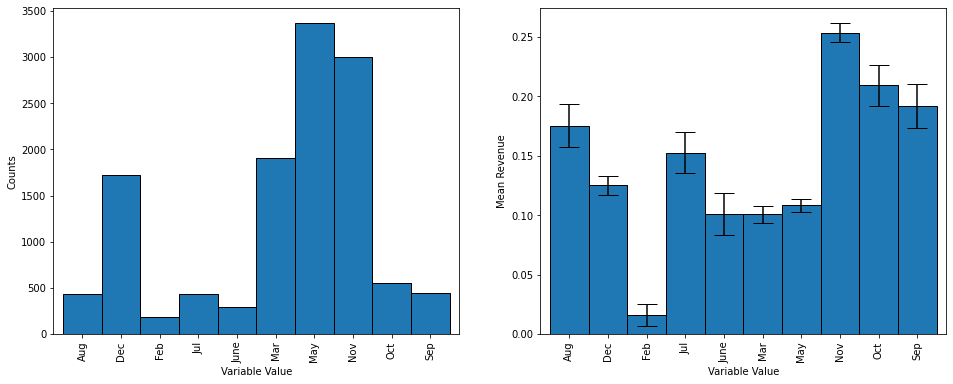

OperatingSystems


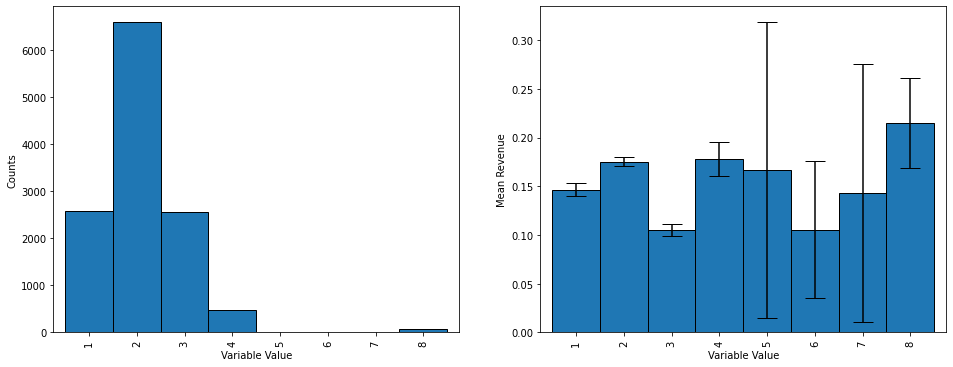

Browser


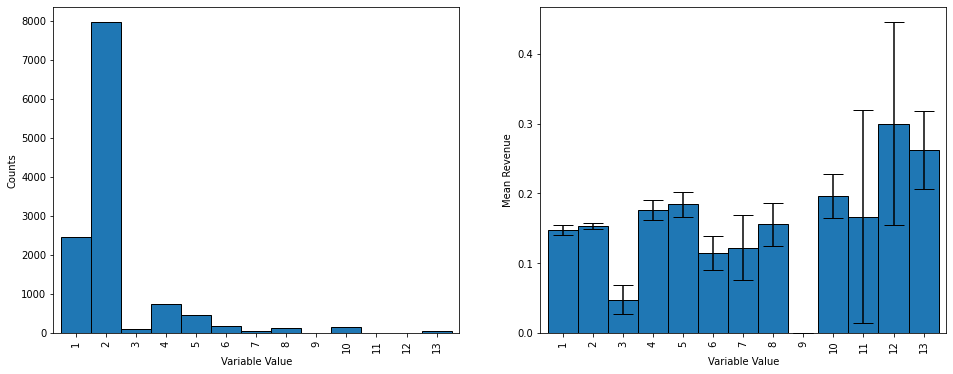

Region


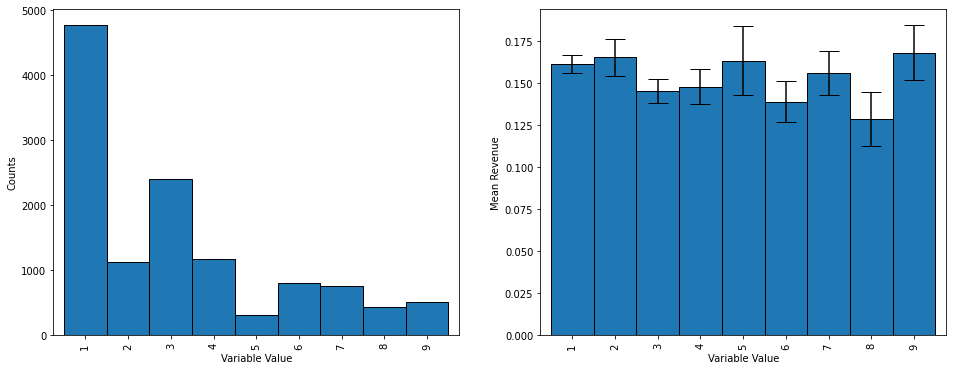

TrafficType


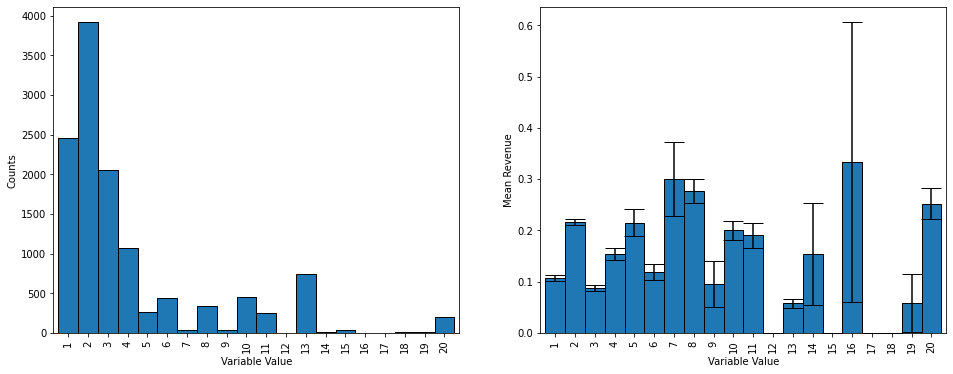

VisitorType


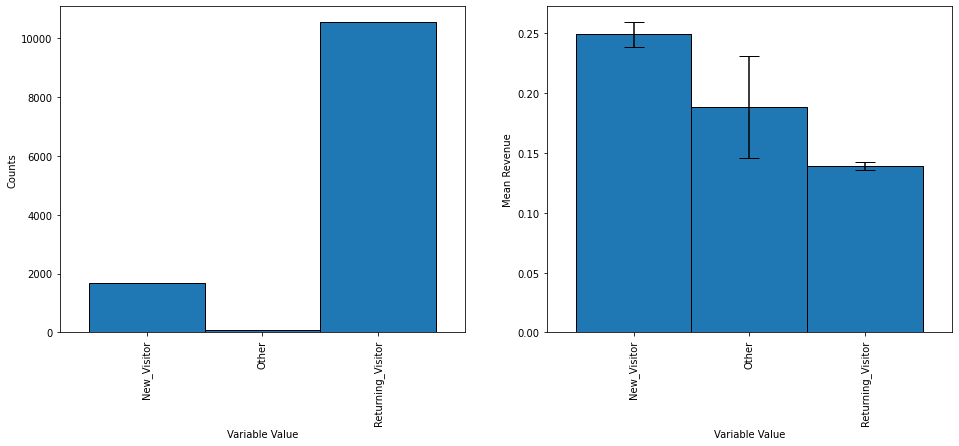

Weekend


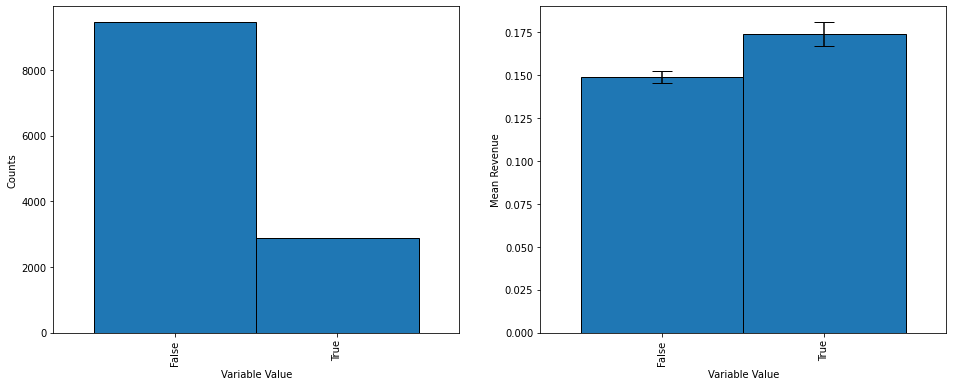

Revenue


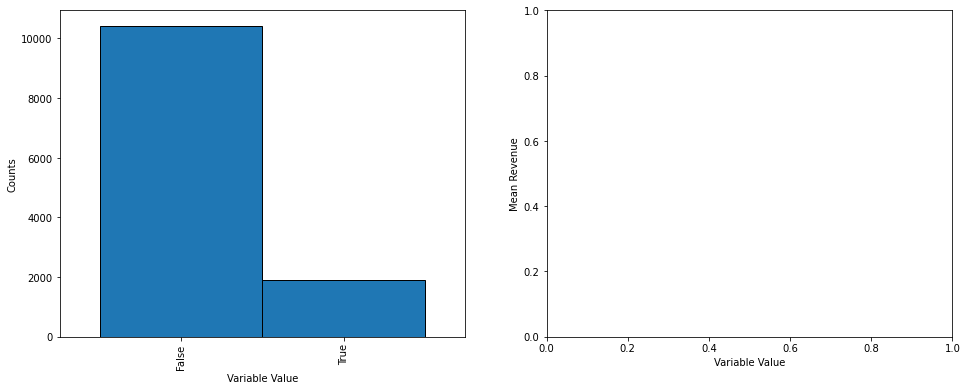

In [210]:
import matplotlib.pyplot as plt
import numpy as np
#plot features
for key in raw_data:
  print(key)
  fig, ax = plt.subplots(ncols=2,figsize=(16,6))
  if 'Duration' in key or 'Rates' in key or 'Values' in key or 'Related' in key:
    #create log binning
    uniquevalues=sorted(raw_data[key].unique())
    minvalue=uniquevalues[0]
    if minvalue==0:
      minvalue=uniquevalues[1]
    maxvalue=uniquevalues[-1]
    startdecade=np.floor(np.log10(minvalue))
    enddecade=np.ceil(np.log10(maxvalue))
    binsperdecade=3
    nbins=1+binsperdecade*int(enddecade-startdecade)
    bins=np.logspace(startdecade,enddecade,nbins)
    bins=np.insert(bins, 0, 0)
    nbins=nbins+1
    
    countdata=raw_data.groupby(pd.cut(raw_data[key], bins=bins, include_lowest=True))['Revenue'].agg(['mean', 'count'])
    stddev=np.sqrt((countdata['mean']*(1-countdata['mean']))/countdata['count'])

    ax[0].set_xscale("log")
    #if key == 'PageValues':
    #  ax[0].set_xscale("symlog")
    raw_data[key].hist(ax=ax[0], bins=bins, ec="k")

    #display(pd.cut(raw_data[key], bins=bins, include_lowest=True))
    #break
    ax[1].set_xscale("log")
    #if key == 'PageValues':
    #  ax[1].set_xscale("symlog")
    ax[1].bar(bins[:-1], raw_data.groupby(pd.cut(raw_data[key], bins=bins, include_lowest=True))['Revenue'].mean().values, width=np.diff(bins), yerr=stddev, capsize=10, ec="k", align="edge")
    ax[1].grid()
   
    ax[0].set_xlim((bins[1]/2,bins[-1]))
    ax[1].set_xlim((bins[1]/2,bins[-1]))

  else:
    raw_data[key].value_counts().sort_index().plot(ax=ax[0],kind='bar', width=1, ec="k")
    if key != 'Revenue':
      #display(raw_data.groupby(key, as_index=False)['Revenue'].mean()['Revenue'])
      #raw_data.groupby(key, as_index=False)['Revenue'].mean()['Revenue'].plot(ax=ax[1], kind='bar', width=1, ec="k")
      countdata=raw_data.groupby(key)['Revenue'].agg(['mean','count'])
      stddev=np.sqrt((countdata['mean']*(1-countdata['mean']))/countdata['count'])
      raw_data.groupby(key)['Revenue'].mean().plot(ax=ax[1], kind='bar', width=1, ec="k", yerr=stddev, capsize=10)

  ax[0].set_xlabel("Variable Value")
  ax[1].set_xlabel("Variable Value")
  ax[0].set_ylabel("Counts")
  ax[1].set_ylabel("Mean Revenue")
  
  plt.show()


These plots reveal clear structure to the predicted Revenue for many of the variables, indicating that modeling should perform reasonably better than randomly guessing. 

This is a supervised learning problem with both numerical and categorical features. There isn't an overwhelming amount of data here. In fact, if we were to employ a one-hot encoding scheme for our categorical variables, then that leaves us with feature space of over 100 dimensions. A robust model should approximately sample the full range of feature space, which means the number of samples should be approximately the dimension squared - in this case approximately 10k which is the number of datapoints we have. However this is on the low end, and so to increase our data-to-features ratio, I will perform some feature selection. 
